# Natural Language Processing
An example to learn about natural language processing, abbreviated NLP, using NLTK. [NLTK (the Natural Language Toolkit)](https://www.nltk.org) is a very easy Python library for working with text data and NLP. 

The data used here is a collection of short jokes in English. Bur you might also consider reading text from a website with the BeautifulSoup library. 

In [20]:
# just once
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
import string
import urllib.request
import bs4
import pandas as pd
import numpy as np
import collections
import nltk # Natural language toolkit
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from platform import python_version

In [2]:
# check Python version
print(python_version())

3.8.3


### Import data
The jokes dataset is retrieved from Kaggle. 

In [3]:
df = pd.read_csv('data/shortjokes.csv')
df.head()

,ID,Joke
0,1,"[me narrating a documentary about narrators] ""..."
1,2,Telling my daughter garlic is good for you. Go...
2,3,I've been going through a really rough period ...
3,4,"If I could have dinner with anyone, dead or al..."
4,5,Two guys walk into a bar. The third guy ducks.


So just two columns with the joke in column `Joke`. Collect the jokes and check for empty jokes. Then print the first joke.

In [4]:
jokes = [joke for joke in df.Joke ]
print(len(jokes))
print(jokes.count(''))
jokes[:10]
jokes[0]

231657
0


'[me narrating a documentary about narrators] "I can\'t hear what they\'re saying cuz I\'m talking"'

No empty jokes!

### Import data (alternative)
Reading data from a website. No further cells for this alternative in the notebook.
```python
url = 'https://pharo.org'
# read the website
html_source = urllib.request.urlopen(url).read()
soup = bs4.BeautifulSoup(html_source, 'html5lib')
text = soup.get_text(strip=True) # get text from html tags and remove excessive whitespace
print (text) 
```

### Removing punctuation and to lower case 
Lower case avoids case sensitive duplicates.

In [5]:
all_jokes=''
for joke in jokes:
    all_jokes += joke + ' '
jokes_clean = all_jokes.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
jokes_clean = jokes_clean.lower()
print(jokes_clean[:500])

 me narrating a documentary about narrators   i can t hear what they re saying cuz i m talking  telling my daughter garlic is good for you  good immune system and keeps pests away ticks  mosquitos  vampires    men  i ve been going through a really rough period at work this week it s my own fault for swapping my tampax for sand paper  if i could have dinner with anyone  dead or alive       i would choose alive   b j  novak  two guys walk into a bar  the third guy ducks  why can t barbie get pregn


## Tokenisation
Finding all separate tokens (convert our `jokes_clean` to tokens) can be done in two ways:
- by means of function `split()`
- using `nltk`

#### Tokenising with Split()

In [6]:
jokes_clean_tokens = jokes_clean.split()
print (len(jokes_clean_tokens))
print(len(set(jokes_clean_tokens))) #unique tokens

4219491
63957


#### Tokenising using NLTK

In [7]:
jokes_clean_tokens = nltk.word_tokenize(jokes_clean)
print(len(jokes_clean_tokens))
print(len(set(jokes_clean_tokens))) #unique tokens

4222866
63953


### Word count
(incudes stop words)

In [8]:
freq = nltk.FreqDist(jokes_clean_tokens) # dictionary with key=token and value=amount counted
for key,val in freq.items():
    print (str(key) + ': ' + str(val))

me: 32352
narrating: 20
a: 171781
documentary: 109
about: 14208
narrators: 4
i: 123374
can: 18649
t: 38790
hear: 5579
what: 56823
they: 23764
re: 10968
saying: 1249
cuz: 317
m: 17409
talking: 1224
telling: 785
my: 48929
daughter: 860
garlic: 18
is: 43197
good: 5289
for: 26313
you: 89027
immune: 18
system: 277
and: 59903
keeps: 594
pests: 2
away: 2031
ticks: 17
mosquitos: 16
vampires: 109
men: 2540
ve: 5990
been: 4128
going: 4873
through: 1704
really: 5199
rough: 100
period: 541
at: 16826
work: 3079
this: 13203
week: 1014
it: 55501
s: 57345
own: 1412
fault: 180
swapping: 5
tampax: 12
sand: 169
paper: 919
if: 18152
could: 3532
have: 23627
dinner: 888
with: 24235
anyone: 1353
dead: 2331
or: 5129
alive: 384
would: 6836
choose: 258
b: 791
j: 275
novak: 4
two: 6672
guys: 2508
walk: 2428
into: 9776
bar: 4867
the: 154083
third: 401
guy: 5806
ducks: 270
why: 23051
barbie: 290
get: 15051
pregnant: 771
because: 15550
ken: 97
comes: 1361
in: 52088
different: 612
box: 835
heyooooooo: 2
was: 27098
m

bombs: 45
rescue: 42
cave: 78
dealing: 55
regret: 111
mole: 49
stew: 39
ouch: 154
standing: 515
park: 584
larger: 71
doubt: 83
opposite: 328
whatever: 382
wearing: 991
pajamas: 47
public: 465
ouija: 71
board: 295
spirits: 72
u: 2166
h: 345
v: 293
k: 354
flips: 40
book: 1194
batteries: 143
hilarious: 142
problem: 968
internet: 920
connection: 70
farm: 164
moved: 164
router: 19
barn: 59
stable: 108
wifi: 196
putting: 466
captions: 3
place: 1127
film: 264
baaahhhd: 1
irishman: 244
brexit: 66
slimming: 4
product: 120
town: 337
lose: 644
pounds: 331
orange: 472
julius: 28
oranges: 68
behind: 872
mimosas: 3
banana: 410
koka: 3
koala: 38
golfers: 27
pairs: 68
incase: 14
crawling: 60
circles: 88
floor: 609
food: 1862
joint: 121
dubstep: 44
makers: 21
sub: 368
wub: 17
fish: 1555
tank: 295
driving: 790
manning: 19
guns: 247
letter: 574
mother: 1369
reply: 222
camp: 272
back: 4481
hamburgers: 51
themselves: 423
ghoulash: 1
situations: 32
whilst: 61
experiment: 38
snow: 519
sleet: 1
hail: 35
ed: 1

add: 363
describe: 252
describing: 61
opinions: 68
assholes: 175
laughs: 149
shocking: 40
tazers: 4
impotence: 10
nature: 103
irishmen: 40
fitzpatrick: 33
patrick: 127
fitzmichael: 11
build: 332
workshop: 15
stuff: 586
animals: 370
mall: 167
handcuffs: 35
feet: 712
kingdom: 36
wont: 122
another: 1610
muzzle: 7
flashy: 8
fits: 131
rod: 48
googling: 42
gary: 122
oldman: 12
loan: 106
million: 542
steak: 253
domineering: 2
retweet: 52
naughty: 121
star: 726
prostitutes: 141
treaters: 6
pillow: 181
muttering: 6
price: 163
spin: 72
jewish: 900
sleeve: 73
ski: 54
blown: 108
emo: 114
cuts: 108
itself: 339
safely: 34
backfired: 4
non: 257
handicapped: 62
parking: 264
spaces: 33
cemetery: 98
unto: 57
john: 615
forth: 113
awarded: 13
eternal: 87
toaster: 195
anna: 31
encourage: 24
bicuriously: 1
busy: 276
6th: 36
selfie: 184
buffet: 65
midwest: 8
excuse: 312
vegetarian: 203
meat: 580
jokers: 4
portuguese: 16
scooter: 17
menu: 123
edge: 98
signal: 70
range: 90
limits: 29
jeb: 38
bush: 266
slogan: 

egg: 616
patron: 32
swimming: 270
wading: 3
divorced: 138
maturity: 8
age: 554
transasia: 1
missing: 434
woodworm: 7
boring: 193
dragons: 75
fireproof: 2
crappy: 33
crush: 149
imagination: 72
wolves: 39
auuuuuuuuuuuuudis: 1
starship: 24
circle: 148
uranus: 99
klingons: 32
weighs: 53
grams: 14
jurassic: 74
reels: 1
lighter: 119
lever: 6
burning: 178
pry: 10
butter: 416
shock: 103
commercial: 145
narrator: 39
spacebook: 1
dancing: 188
realise: 60
obviously: 215
rude: 156
shiit: 1
mushrooms: 57
disturbs: 3
attraction: 18
girlfriends: 161
fact: 518
pastaway: 4
buttons: 69
atmosphere: 72
flan: 8
custardy: 11
laughing: 315
habit: 106
biting: 58
finding: 360
picky: 20
fuckers: 29
website: 215
local: 470
shhhh: 16
mona: 29
lisa: 56
ambiguously: 1
bulk: 9
costco: 48
ra: 11
manufacturing: 19
ol: 36
traditional: 50
marriages: 38
major: 205
cosmetology: 6
program: 128
cant: 373
trans: 97
fats: 22
miyagi: 10
wax: 56
ceo: 96
announces: 39
resistant: 15
swiss: 57
switzerland: 67
plus: 206
simon: 30
g

paddy: 65
furniture: 184
fonts: 13
pinocchio: 61
poison: 81
advertising: 56
shoplifting: 28
prostitue: 6
cheque: 12
bounces: 21
chocula: 3
combination: 33
sighted: 29
cramps: 15
snoop: 204
theory: 124
snoops: 1
disappointed: 194
wooden: 174
engine: 94
chassis: 1
climbing: 60
gifts: 85
present: 233
forgotten: 62
puppy: 177
tweeting: 98
signed: 71
vigour: 1
slipperiest: 1
gorillas: 52
playwright: 6
eugene: 6
neill: 1
yoga: 177
negotiate: 30
treaty: 5
wardrobe: 28
dairy: 118
annoy: 67
2007: 17
banned: 160
protected: 25
ellen: 96
pao: 104
ninjaedit: 1
santana: 2
molesting: 8
reward: 35
behavior: 42
training: 175
ways: 220
refused: 85
entry: 38
shouted: 128
position: 284
required: 64
headlights: 11
sweden: 35
ludacris: 11
conjoined: 17
dolphins: 72
dual: 17
porpoise: 71
mt: 41
everest: 39
astronaut: 194
highest: 73
peake: 2
subreddits: 14
cope: 17
schizophrenia: 24
proof: 142
sufficiently: 1
talented: 29
pessimist: 62
pleasantly: 4
satisfaction: 19
knowing: 156
enchanted: 2
wat: 55
mcgonaga

tamer: 9
fined: 16
parked: 85
colonoscopy: 17
colonoscpportunity: 1
gastroenterologist: 5
motivational: 21
diarrhoea: 19
classified: 13
hereditary: 70
diseases: 30
ruined: 147
health: 188
interviews: 19
applicant: 17
hired: 136
climbs: 32
downhill: 33
broker: 11
cashing: 2
stocks: 15
coinstar: 5
clarinet: 12
rick: 119
astley: 56
borrow: 157
pixar: 58
nemo: 28
mobile: 126
kayne: 9
leaning: 23
wing: 95
ww2: 30
shortages: 5
countries: 112
fuels: 11
mussolini: 14
trains: 79
thyme: 78
chord: 42
sus: 3
volcano: 52
muppets: 12
shanking: 1
photos: 155
jordan: 34
taxes: 103
2kids1dog: 1
tus: 1
archer: 10
arrowgant: 1
allergic: 116
hotness: 6
paralyzed: 21
escapes: 23
dooooooo: 5
goatlike: 1
reflexes: 38
catlike: 4
baaah: 2
begins: 112
shingles: 18
glitter: 53
embrace: 19
shiny: 29
eyebrow: 27
agar: 3
io: 6
cellf: 1
shambles: 4
5mins: 1
ambidextrous: 13
firstly: 4
faked: 23
described: 58
unchaperoned: 1
jumpy: 4
setup: 18
ivanna: 3
ox: 12
col: 3
salesperson: 18
strong: 272
belief: 34
yeaa: 1
pla

corgi: 8
ographer: 1
piers: 9
morgan: 59
1000: 124
shrinks: 4
samples: 22
optimized: 2
supershrink: 1
mattel: 6
divorcing: 15
550: 1
effort: 52
hebrews: 69
checkin: 5
random: 225
tuned: 9
acid: 143
beetle: 27
incognitoad: 1
troops: 16
mating: 29
mantis: 25
bday: 12
holey: 11
november: 50
flow: 33
deactivate: 5
followers: 107
optimistic: 34
a1: 12
stamping: 1
retard: 42
origami: 34
carrier: 25
mozzarella: 9
disasters: 22
downfall: 2
overthrow: 10
feng: 9
shui: 7
carl: 52
screamed: 81
waxing: 14
sniggering: 2
ambience: 2
nee: 5
naw: 24
woooooo: 1
niagara: 21
agency: 31
turnover: 14
bloodhound: 4
yak: 9
network: 70
marketing: 40
turban: 20
buttered: 9
underground: 54
backed: 39
nosing: 2
depth: 38
perception: 31
scare: 107
hall: 55
rereleasing: 1
baggie: 4
eric: 88
clapton: 60
ceasar: 9
ads: 61
thousands: 140
panel: 18
hollow: 36
tossed: 19
pikachu: 69
gpa: 25
cecil: 13
rolex: 57
misunderstood: 68
lately: 168
seated: 12
pride: 88
cobain: 39
ultrasound: 28
handus: 1
legus: 1
practically: 2

percent: 82
peckers: 12
godmother: 9
quieter: 11
angels: 41
inventing: 30
sneeze: 89
dang: 39
subs: 14
weiners: 3
antivirus: 11
starving: 73
decaffeinated: 20
utensils: 23
narcissist: 35
propensity: 1
domestic: 75
postal: 13
devon: 2
dildos: 21
squatters: 6
equation: 38
radical: 53
freddy: 17
krueger: 3
thighs: 61
taxidermist: 26
tracked: 4
projects: 13
aardvarks: 12
disguise: 31
inhale: 4
seed: 34
lungs: 21
ostrich: 21
commits: 18
heresy: 2
ostrichized: 1
oinkment: 18
remembered: 103
quitter: 8
struck: 46
competing: 23
recycle: 27
dubya: 5
coloured: 17
unicorns: 22
secular: 6
twerking: 22
cyrusly: 1
exclaim: 7
copyright: 30
casseroles: 1
strictly: 14
whoover: 1
101: 42
guac: 24
beside: 77
hoffman: 13
sss: 1
travolta: 14
telegraph: 10
operators: 6
remorse: 11
ssy: 3
offending: 8
masks: 33
55: 27
trinary: 3
gir: 3
raft: 20
lunchtime: 11
inversely: 4
proportional: 13
5c: 1
ously: 1
unlikely: 18
romans: 40
execution: 48
newswoman: 1
dictatorship: 8
embassy: 6
separate: 98
entrance: 34
fas

tightly: 8
vacationing: 13
scenery: 2
avatar: 20
untie: 14
sioux: 7
patels: 4
chins: 15
throne: 23
pistachios: 8
kidnapped: 80
93: 18
superhero: 90
remake: 22
hollywood: 58
overreact: 9
volley: 3
depp: 38
pierce: 7
exes: 28
grinds: 24
gears: 29
clutch: 17
identical: 44
eau: 11
toilette: 2
eww: 10
imitating: 4
flamingos: 10
reject: 18
feo: 3
fav: 19
sharon: 15
crowdsource: 1
defective: 10
poking: 22
hunger: 85
poverty: 28
seatbelt: 48
spoils: 9
columbus: 44
sodas: 8
minisoda: 5
suggested: 68
cheat: 93
kit: 63
kats: 5
cokes: 9
packets: 35
crisps: 15
450: 8
keg: 9
philosopher: 52
frat: 33
socraytes: 1
pecker: 35
dearest: 8
sherbet: 4
appeal: 35
127: 16
worldcup: 1
255955: 1
300186474: 1
coupon: 27
expire: 11
brandi: 2
repeatedly: 59
insisted: 19
pandas: 26
embarrassment: 23
pleasure: 78
pilates: 11
ejokulation: 1
estimated: 10
compulsion: 1
suffers: 35
obcd: 1
megs: 1
howwwl: 1
lemonade: 58
strawberries: 21
iv: 31
gallons: 22
worshipped: 6
admissions: 2
hamlet: 34
birdbrain: 1
jockey: 17


oying: 3
ascent: 9
bpo: 9
pvt: 3
ltd: 3
maroon: 12
levine: 7
masonry: 6
concrete: 62
squashes: 1
bing: 46
crosby: 4
ballin: 2
foo: 9
fighters: 28
kneeded: 3
conquered: 21
bohemian: 10
rhapsody: 6
accountability: 1
hairdresser: 33
clingy: 22
dependent: 16
zinfandel: 1
sniff: 42
prayers: 41
aquarius: 4
arrrrrrhh: 2
bonding: 12
viagara: 3
reform: 13
rebels: 6
aldeerwrong: 1
classifieds: 16
jizz: 19
consume: 22
pincushion: 2
owen: 12
pizzeria: 11
meteor: 49
spaceship: 26
acutely: 1
route: 34
jupiter: 29
stupider: 7
oxygen: 91
memorials: 1
petitions: 1
emotional: 86
ruth: 21
whiteboard: 10
prof: 13
faggot: 41
troopers: 14
callin: 5
buttcrack: 2
particles: 24
ajax: 2
poops: 32
neat: 35
trance: 6
techno: 7
updog: 53
assigned: 12
buzzillion: 1
splitting: 13
epidemic: 16
stain: 37
britches: 7
ghosting: 1
scaring: 16
dictator: 73
minidisc: 1
jurisprudence: 7
technicality: 15
unilateral: 1
orchiectomy: 1
urologist: 26
tachyon: 26
mermaids: 46
doth: 3
striketh: 1
demongod: 1
surfaces: 6
pringles: 

testament: 14
historical: 21
controlled: 14
enforcement: 12
weiner: 41
huma: 5
downside: 23
resists: 1
dominos: 12
oregano: 8
brah: 12
tadah: 1
crook: 16
feces: 27
elections: 38
multitasking: 10
5yo: 62
tablet: 22
resorted: 4
frustration: 23
1985: 9
unlimited: 34
breadsticks: 14
spellcheck: 5
spatula: 13
geography: 38
bermuda: 19
beth: 6
statically: 2
indeterminate: 2
beam: 25
dodgems: 1
funfair: 18
dismissal: 5
ubisoft: 9
arrrrrrrr: 5
coda: 3
wistfully: 3
auful: 2
ni: 12
embarrasses: 4
hymen: 11
restored: 4
allstate: 1
whim: 32
potatoe: 4
consisting: 5
1995: 14
cremate: 8
urned: 3
hath: 23
inconvenienced: 4
cookin: 3
spartaa: 1
caring: 27
blueberries: 9
c4: 19
padajuan: 1
blockhead: 2
plainly: 2
genesis: 8
commandments: 21
152: 3
tricky: 12
yayyy: 1
pharaoh: 46
anteloping: 1
pall: 3
badman: 1
whoman: 1
mouthing: 5
boxing: 72
oralgumi: 1
5ths: 14
duckling: 12
demolition: 10
thankfully: 23
stripped: 9
breathed: 7
releaf: 2
kale: 37
doughnut: 34
somersault: 3
keyed: 6
shute: 1
supervilla

overdressed: 3
freeman: 38
puffs: 5
trix: 13
threadrick: 1
inlaws: 9
theanalrapist: 1
estranged: 4
williams: 96
naughtsy: 1
remission: 1
infantalism: 1
pimps: 13
deanda: 2
dis: 54
eeem: 2
unintended: 5
ff: 8
eighty: 12
tensions: 5
bakeries: 4
neutered: 12
blanks: 12
appalled: 8
profanity: 17
gurl: 21
eeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeey: 1
cu: 9
mascara: 19
xo: 4
polter: 1
robotussin: 2
heaters: 7
tapping: 18
canned: 27
declaring: 9
ripe: 25
clogged: 21
flamboyantly: 7
satchel: 2
ventriloquism: 6
fisting: 8
espn: 15
ncaa: 5
singers: 21
cholesterol: 22
wiener: 43
witchcraft: 5
dork: 8
brokeback: 16
adhesive: 5
tahoe: 2
yummier: 2
firefly: 14
bitching: 8
giggled: 9
kevlar: 2
aaaaaaarrrrrrrrrrrrrrrrrrrr: 1
examined: 14
welshman: 35
sheepless: 2
seattle: 34
polytheist: 1
theist: 9
catalyst: 2
boners: 13
recruit: 13
rig: 12
interrogation: 26
jewel: 7
suggestion: 32
funky: 6
wwwrrrrrrgwwwrrrr: 1
jalapenos: 5
communist: 111
commie: 14
eyetalian: 1
detects: 2
encounter: 16
assure: 6
pilgrimage

supplier: 1
shun: 2
miracles: 13
taped: 39
purrrramid: 1
scholarship: 12
limboer: 1
disqualified: 15
port: 27
52: 48
advert: 14
allergies: 36
exterminated: 1
bitchiness: 2
amiright: 2
mormon: 62
disappointingly: 2
wastes: 3
infinity: 33
notify: 7
amended: 1
apologizing: 15
pecking: 2
oody: 1
oodpecker: 1
ovation: 6
mitosis: 21
surveyors: 1
chiefs: 5
sluice: 1
stomps: 6
napoleonic: 1
heirlooms: 2
precipitate: 3
tralfamadoloreans: 1
sly: 11
sheared: 1
shear: 9
epicfrail: 1
alkaline: 8
obia: 1
patience: 38
crocheted: 3
needles: 18
torres: 2
proudly: 27
thia: 1
boyscout: 8
bardvark: 1
thoooooooose: 1
exorcism: 21
roars: 8
restrain: 3
sumos: 1
chummy: 1
keanu: 26
reeves: 32
pointer: 22
cavemen: 25
selves: 9
rocked: 9
lather: 12
rinse: 19
analyzed: 3
ska: 13
crank: 9
retinas: 2
telemarketers: 9
commas: 27
canoes: 9
draper: 4
hallways: 5
institutions: 2
jackie: 27
shrof: 1
bappi: 1
bappa: 1
voluntarily: 6
humanitarian: 10
cowculator: 9
fallon: 14
ptsd: 11
viet: 15
atic: 1
drying: 16
chelsea: 

pamela: 18
anderson: 28
ounces: 6
graffiti: 14
chickpeas: 18
geologist: 38
battles: 16
disproves: 2
dividing: 8
nip: 8
peeling: 18
antwerp: 1
zipping: 3
milfy: 2
thumping: 2
1500: 6
aaaaaaaaand: 1
kenya: 18
niger: 3
congo: 2
ghana: 9
togo: 3
mer: 4
ruinan80ssong: 2
breathalyzer: 9
academic: 11
veterinarian: 33
samoyed: 1
bizkit: 3
durst: 4
hol: 3
rehearsed: 2
asexual: 10
iqbal: 1
skyskrapers: 1
basketballs: 3
courts: 7
shihtzu: 7
mlg: 3
campers: 13
dyes: 23
ehhhhh: 3
emailed: 24
consolations: 1
foghorn: 5
crane: 21
bragged: 6
disputed: 1
origins: 2
borg: 14
feudal: 1
trebek: 7
beverages: 10
agendas: 1
toyotathon: 2
deciduous: 3
decisive: 2
peeks: 7
borderline: 16
tanzania: 2
negotiations: 3
innuendo: 35
defecate: 3
loophole: 6
libertarians: 8
cyanide: 14
picasso: 19
markers: 7
venice: 10
gondolances: 2
inssiiiddee: 1
burkina: 1
fatso: 4
hysterically: 14
isotopes: 8
shins: 12
sorrows: 6
satyr: 3
grek: 1
guardians: 17
groot: 9
antifungal: 3
farthing: 1
piercings: 14
admires: 3
weinner: 1

demented: 2
carving: 15
disfunction: 14
prunes: 3
hayy: 1
greeted: 19
phew: 42
zeus: 13
mortall: 1
cancellation: 2
lined: 25
agape: 2
pollutes: 1
moshing: 1
thera: 1
punisher: 6
ladens: 1
delima: 1
euphemism: 11
tentickles: 7
remodels: 2
reformation: 2
macleod: 4
tickled: 15
addictionary: 5
dummies: 19
disfigured: 3
span: 19
88: 19
bzzz: 1
megabyte: 2
retire: 41
counterfeit: 13
banknote: 1
fetch: 26
photographed: 9
videotaped: 1
spite: 3
beak: 18
joyous: 2
overshot: 1
coyotes: 6
bachelorette: 5
sparked: 1
combustion: 5
pistons: 2
multiplication: 5
sooooo: 10
mel: 16
gneiss: 11
declaration: 7
freud: 46
funf: 9
sandman: 2
uniformed: 2
uninformed: 4
unformed: 1
deposit: 31
withdrawal: 9
bribery: 1
coli: 10
refressing: 1
natbaimel: 1
dragracers: 1
cruelty: 11
feast: 5
martyr: 3
albee: 3
upsets: 4
brody: 1
passages: 2
unconscio: 1
toboggan: 5
1001: 3
swelling: 6
thold: 1
donkeys: 21
mountainous: 1
vegetation: 1
coward: 10
adavance: 1
balding: 9
beleive: 1
demoted: 2
tran: 4
brthday: 1
apolo

okilydokilycupid: 1
flegh: 1
fnnnr: 1
grmm: 1
jsssh: 1
jhee: 1
jo: 7
browsers: 5
assad: 5
sambo85: 1
sikipedia: 3
kuz: 1
condemns: 1
sovereign: 6
784: 1
soulmate: 17
solves: 14
jumbos: 1
validation: 10
pupvotes: 1
stakeouts: 2
aswell: 4
sequitur: 6
loompas: 6
yuuuuuuuuuuuug: 1
oslavia: 1
superglue: 14
chitchat: 1
vitals: 1
stalkers: 6
roam: 8
electile: 5
j0rm7h3: 1
lamborghini: 32
bounced: 12
snacktive: 1
retarrrrrrrrded: 1
wilting: 3
3yr: 12
chimneys: 8
butterface: 2
absolving: 1
dinosore: 4
highways: 5
sutherland: 4
nigeria: 13
bok: 15
sox: 6
shhoooooooooooooeeeeeesss: 1
shoooooooooooooooooose: 1
supplements: 6
bratwurst: 6
lmfao: 12
bolivia: 4
whistleblower: 19
mahogany: 7
batallion: 1
methed: 4
carlsberg: 2
exceedingly: 4
bjork: 13
passionate: 19
maneuvers: 2
molding: 2
pesticide: 6
isengard: 1
breastfeed: 12
antigravity: 2
nilla: 1
1998: 22
thot: 10
boast: 10
mitochondria: 11
yourtochondria: 1
encounters: 7
ayyyds: 2
minivans: 7
cubholders: 1
erased: 2
negativity: 15
preheat: 8
pe

tangents: 6
deterrent: 2
kant: 11
cyberpersons: 1
propellers: 2
haaaaaaaaaaaaaaaaaaayyyy: 1
interchange: 2
mctrump: 1
hopscotch: 6
deplorables: 2
scholar: 2
biv: 3
fug: 1
overseas: 12
ios: 10
ceas: 1
mango: 19
honeydew: 14
forearm: 2
demonade: 1
refraction: 4
ceebs: 1
stoneworker: 1
mooooovies: 1
disowned: 4
happines: 1
represented: 3
exchanging: 7
cuntstubble: 5
burlesque: 2
howl: 6
montell: 1
introduces: 11
howie: 2
dewitt: 1
crusaders: 3
salutes: 1
privitisation: 1
reenactment: 7
hobos: 13
slurpent: 2
employers: 8
inactive: 5
midas: 10
facepalm: 9
realises: 10
racquetball: 2
footwear: 12
succinct: 3
buildup: 4
unwieldy: 1
reckons: 9
torques: 1
accepts: 11
rationalism: 1
slashed: 8
meltdowns: 2
compartmentalize: 1
illa: 2
recliner: 15
mistook: 18
dyslecsics: 1
booklets: 3
obnoxiously: 2
infatuation: 3
stabby: 6
hunters: 39
trenchcoat: 12
facte: 1
berlusconi: 1
concordia: 2
gash: 6
papercuts: 1
nv: 1
buzzer: 7
baeman: 1
phillip: 11
tortoise: 35
wildlings: 2
remembrance: 4
greed: 9
boo

splintercunt: 1
risen: 10
alpine: 2
batch: 14
buster: 10
haaaaayaaaaay: 1
accumulating: 3
teehee: 5
uncooked: 10
gettyimages: 1
res: 7
156534295: 1
fluently: 3
knowski: 1
gluing: 5
pricey: 3
learns: 24
assacre: 1
playgro: 1
homegirl: 2
davy: 13
crockett: 10
zilch: 2
herrooo: 1
detour: 4
dreadlock: 2
spaced: 3
thomas: 34
tyrano: 1
valets: 1
discounted: 5
prominent: 5
13th: 34
amblein: 1
averted: 2
norseman: 1
2uje2o: 1
url: 8
3a: 1
2f: 1
2fwww: 1
2fwatch: 1
3fv: 1
3dzfoy5ghv9rm: 1
debby: 5
408: 1
inconclusive: 4
findings: 7
bugger: 3
abuses: 5
ello: 6
forecaster: 3
manhattans: 1
mojitos: 2
ryes: 1
ihop: 36
periscopes: 1
jewels: 3
mannequins: 4
noticeably: 3
pedicurist: 1
blacktoes: 1
redesign: 4
60s: 12
nighty: 1
redundancy: 6
intermissions: 1
retrained: 1
mediocrates: 1
philosophical: 17
viewpoint: 1
eeeeehhh: 1
prop: 5
catchphrase: 4
oramge: 1
bjs: 4
rearrange: 20
requested: 15
cockadoodaldoo: 1
deeeeeeelicious: 1
reprince: 1
flashbacks: 10
kickstand: 2
icing: 12
troupe: 13
typographe

tween: 3
thorns: 3
soiree: 2
mooove: 2
campgrounds: 1
plains: 10
concorde: 2
censorship: 12
commemorative: 3
collected: 11
acidity: 1
shaun: 9
fawkes: 5
celibate: 4
cornflakes: 10
autocracy: 1
theocracy: 3
pedocracy: 1
chuckled: 6
lastlinesfromgreatbooks: 2
journalist: 22
ticles: 1
solder: 1
dilf: 2
preamble: 1
froton: 1
pratchett: 1
woohoo: 7
sealevels: 1
rapid: 12
decomposition: 2
513: 1
asst: 1
hannity: 2
deers: 5
fishmongers: 3
fillet: 6
732: 1
vapes: 2
gluteus: 4
maximus: 4
bullied: 22
oooooooooooooooooooooooooohhhhhhhhhhhhhhhhhhhhhhhhhh: 1
snuggles: 1
wildstyle: 1
snackmouth: 1
14159265: 1
clammy: 2
residual: 1
striking: 9
sriracha: 4
redpost: 1
impressionistic: 1
debussy: 5
podcasts: 4
drenched: 4
lustful: 3
veganism: 3
westworld: 2
8hrs: 1
chomping: 2
exxon: 1
mobil: 2
amal: 7
hippopotomonstrosesquippedaliophobia: 1
backspace: 5
keypad: 1
blinks: 9
nightie: 2
rented: 17
cincuentas: 1
medicating: 1
scholarships: 1
effing: 3
steph: 9
vicious: 17
braaaaaaains: 1
poofy: 3
martianma

moble: 1
upp: 1
fenugreek: 1
methi: 1
antiantijokes: 1
tbs: 6
milne: 1
aam: 2
cheez: 10
mutt: 4
verification: 1
zooey: 8
deschanel: 8
niantic: 6
147: 3
learner: 5
ungild: 1
sulfur: 6
alo: 1
optimystic: 1
promotions: 1
specialized: 6
leftists: 2
misreading: 1
scouring: 1
shofar: 2
hostesses: 1
policing: 2
slurp: 3
retires: 14
pallbearers: 6
lifters: 2
herding: 1
alphabets: 6
pud: 3
uge: 1
isertation: 1
briefing: 2
cp: 5
timelord: 2
frequenting: 3
rts: 12
decompose: 10
studys: 1
tanking: 1
chubsucker: 1
baleing: 1
vaporized: 2
fade: 6
autographed: 2
44z1io: 1
lectures: 3
bohred: 1
diseased: 10
crossdresser: 4
hijab: 5
aoohhh: 1
jedis: 7
locket: 12
tattlesnake: 1
wellllll: 1
waistband: 3
steinway: 2
wurlitzer: 3
rior: 1
snuggle: 10
redditer: 3
mayday: 4
painters: 8
underemployed: 2
submissions: 4
vag: 8
fetching: 8
picard: 16
hulu: 7
lolololol: 2
merlot: 4
fragrances: 2
fuji: 2
timber: 4
gentlement: 1
repeal: 5
magikarp: 4
violinist: 8
calcium: 5
reasoning: 7
logan: 3
179: 1
uglies: 2
fre

romania: 2
shamrock: 2
cauldron: 9
footlocker: 1
oook: 1
wasanigger: 1
brainless: 3
abomination: 8
thors: 1
secretive: 6
ziti: 2
braging: 1
likeness: 5
regard: 4
quizno: 3
giraffic: 5
hahhhahaahhahaa: 1
ateists: 1
hacidic: 3
rios: 1
princeton: 2
2019: 8
competitively: 2
brownen: 1
unplugging: 5
pocahontas: 4
pokin: 1
colostomy: 10
blottingpaper: 1
absorbing: 2
unprecedented: 3
apartments: 7
obla: 2
ebony: 6
matgarita: 1
imposta: 1
undead: 14
categories: 5
bullsh: 6
1780: 1
concealer: 5
tyroneosaurus: 2
aluminati: 1
nncos: 1
chiton: 1
eumenides: 7
euripedes: 2
reales: 1
fellowship: 1
offline: 10
hijklmno: 3
yogurts: 5
frankenbarbie: 1
railway: 9
tailgatin: 1
schoolin: 1
tailgate: 4
bated: 1
loko: 2
philboard: 3
partied: 4
shiva: 3
catapults: 1
holloweenie: 1
rueful: 1
contradict: 5
uselessness: 2
endeavors: 1
massively: 1
icelandic: 6
tookalook: 3
experimentation: 1
kris: 7
kross: 5
paratrooper: 3
callers: 2
hastily: 5
airbud: 1
rted: 3
fatigue: 6
posession: 2
llanfairpwllgwyngyllgogery

utility: 7
keying: 2
subsequently: 5
neigborhood: 1
deen: 16
3o: 2
fuhrerro: 1
rocher: 8
tobias: 2
daugther: 1
stalling: 3
monopole: 1
forester: 1
sorted: 10
56m: 1
thefaucet: 1
mclean: 1
restructuring: 1
messie: 1
dundee: 2
dota: 5
drifts: 1
overdoses: 3
pedic: 1
pornographic: 3
ecilop: 1
sweatsuit: 1
scaaaaaarrves: 1
megasaurass: 8
miniaturized: 1
blindfolding: 1
nominations: 4
multimillionaires: 1
wata: 3
fertility: 5
asterisk: 6
kushie: 2
koo: 2
nukes: 12
rockin: 8
furrowing: 1
dissolve: 6
bundle: 12
fasces: 1
kiedis: 2
otherside: 3
jewishes: 1
knighted: 8
loin: 11
costing: 5
solvent: 7
manatees: 5
stresses: 2
cdo: 11
yeller: 5
ighost: 1
hauled: 2
kolkata: 1
jergens: 1
fiend: 8
exhilarating: 2
mandolin: 3
wyatt: 1
earp: 1
inclusive: 3
lurkers: 1
eloquent: 1
apache: 9
piscina: 1
flunking: 1
phrased: 2
zt8x6: 1
mensch: 2
cinematic: 1
manholes: 4
cheesie: 1
moats: 1
lightsabers: 5
wario: 2
coked: 2
unconsidered: 1
blather: 1
psychedelic: 4
playthings: 1
whinnie: 2
fetishists: 4
corrug

dietary: 3
polarbear: 1
farsighted: 2
scapegoat: 2
pablow: 1
ppfdrtrrtrt: 1
fartnoises: 1
oates: 2
flintstoning: 1
mf: 2
88th: 1
muggy: 6
poorest: 7
plunderin: 2
1234: 5
14159265358979323846264338327950288419716939937510: 1
campaigns: 7
ein: 9
spewing: 3
eggys: 1
chicsas: 2
shiksa: 1
gentile: 2
punkable: 1
candlelit: 1
clergymen: 1
storming: 5
undergoes: 1
flourine: 2
sailboat: 4
eumenedes: 1
outlets: 8
funimation: 1
dub: 8
improvised: 2
challah: 14
argumentative: 4
meditate: 7
abstracts: 1
shaven: 5
furred: 2
dipers: 1
ouestion: 1
yanks: 6
expos: 1
laurie: 4
scurry: 4
steganosaurus: 1
encryptid: 1
lsu: 4
geaux: 1
crazier: 4
smalltalk: 2
rotflmao: 1
orient: 2
stephan: 1
requiem: 2
memers: 1
dylexsic: 1
insomiac: 1
lunchables: 4
mingling: 2
antijokes: 15
skirting: 1
deadbedrooms: 1
parkourist: 1
suger: 1
summersalt: 1
jin: 2
balackman: 1
yids: 2
solliloqueef: 1
cower: 1
diverted: 2
hazelnuts: 5
conservatories: 1
cookouts: 2
morbids: 1
bananaphylactic: 1
uwu: 1
otber: 1
joget: 5
gelek: 6

gruntled: 2
pythagoras: 3
programmerhumor: 2
999999999: 1
sfdeljknesv: 1
afroman: 2
6c: 1
johntole: 1
geneticists: 3
crispr: 1
snapschapts: 1
saucerful: 1
secretions: 1
kari: 1
unrolls: 3
rodman: 5
chumlee: 2
rangering: 1
moooooslim: 1
errorrs: 1
burnham: 9
cockadoodledoo: 2
anycockwilldoo: 1
overthink: 3
zambia: 2
succumbed: 1
actively: 4
captors: 2
pompeii: 7
zings: 1
opiates: 1
pixies: 2
imperative: 1
braaaaiiiiinnnnssss: 1
uselessly: 1
madly: 5
tyrannosauri: 1
philofficer: 1
arrghh: 1
exs: 2
dadblock: 1
leann: 2
rimes: 2
devry: 1
cusses: 2
apostles: 11
gynecolo: 1
astrologist: 1
abcdefghijk: 2
limbaugh: 6
146: 2
703: 3
436: 3
ferociously: 1
ironey: 1
condescension: 3
bons: 1
hld: 1
aay: 1
nuclea: 1
coad: 1
oned: 1
regretdesi: 1
smears: 2
asda: 3
ehhhhhhh: 1
vogue: 5
aston: 4
0800: 2
1066: 1
pretented: 1
celtics: 2
schoolboys: 1
craic: 1
guiness: 3
chocobo: 1
kweer: 1
lecherous: 2
sufi: 1
burkini: 1
ouagadougou: 1
mistreating: 1
anwser: 1
homtydumty: 1
spined: 1
refollowed: 1
quacke

8748: 1
kilometer: 2
obscenities: 5
morgurt: 2
jamaicans: 7
israelis: 3
creaky: 2
johnathan: 1
hicks: 1
woolie: 1
worming: 1
hufflepuffed: 1
slytherin: 12
skits: 3
trolled: 1
2150: 1
sorryforthelolz: 2
quem: 1
tem: 2
chefe: 1
indio: 1
nhoque: 1
trilha: 1
sonora: 1
aprenda: 1
nada: 5
sobre: 1
cozinha: 1
fouurth: 1
vichy: 1
mooooootorcycles: 1
petticoat: 2
chong: 4
workouts: 6
112: 6
loom: 1
mourningwood: 1
moana: 1
knoooooooows: 1
goooooooooooooes: 1
dumbledoor: 1
reacing: 1
att: 2
xerox: 4
leks: 1
fortuna: 1
meyers: 4
hyphae: 1
cyruses: 1
bein: 3
spoilt: 2
shite: 5
showerkraut: 1
rapport: 1
broadcast: 7
spectacular: 4
spayed: 3
pewdiepie: 2
exorcise: 12
zoombie: 3
battlepig: 1
flail: 3
capy: 1
infront: 6
correlate: 1
populations: 4
operetta: 2
marietta: 1
terrifies: 4
flogging: 5
lamarrghhhh: 1
coloscopy: 1
benghahtzee: 1
nutjob: 2
unforgettable: 2
purrr: 2
vert: 1
measureable: 1
jumpoline: 5
mockingly: 3
stopp: 1
iiit: 1
replicate: 3
repurpose: 1
functionality: 1
babiess: 1
mandaloria

1807: 1
saltiest: 2
mccormick: 1
780: 1
neintales: 1
profited: 1
madoff: 5
manfriend: 1
icey: 1
aaaachhooo: 1
nulllaserpointerexception: 1
wodesia: 1
refried: 2
crowdsourcing: 1
satnav: 1
kardassian: 1
gul: 1
gonorreal: 1
nationalists: 2
bandits: 1
honors: 4
kaitlyn: 1
yamahahaha: 1
pullup: 1
worshiper: 5
meshuggah: 1
brrrr: 5
doghouse: 8
downturn: 2
oldies: 2
15yo: 5
conquest: 1
errant: 2
femi: 1
sunburns: 2
limitation: 1
achieving: 4
decomposer: 2
blossoms: 1
dst: 1
funnyordie: 1
12d1747cd7: 1
hassidic: 2
heavyweight: 3
featherweight: 1
genial: 1
ire: 2
xbp1: 1
ridd: 1
intron: 1
haemorrhoid: 1
cuckold: 2
orale: 1
thickness: 6
asianshowingoff: 1
chech: 1
slimey: 2
embark: 2
appetizers: 5
2044: 4
shackles: 1
coprophiliac: 2
nilly: 2
ance: 2
todojaw21: 1
outreach: 1
dnt: 4
boozing: 1
arrghhvjvjvkkrhvy: 1
papi: 2
milkbone: 2
progressing: 1
marginally: 2
youkip: 1
trimmers: 5
supercuts: 2
trample: 2
dirvorce: 1
mutants: 4
dementors: 2
sementors: 1
proclaims: 4
insolent: 1
0scars: 1
lebeou

1914: 3
geopolitical: 1
demille: 1
breadroll: 1
instructionswoman: 1
varied: 1
undefined: 6
tangly: 2
burpies: 1
sayid: 1
counterexample: 1
globetrotters: 2
scoffing: 1
detonator: 1
graduating: 9
clanging: 2
iris: 3
drier: 2
sicily: 6
lepton: 2
inexplicable: 2
preface: 2
giggloo: 1
reservoirs: 1
205: 1
204: 2
203: 1
202: 1
201: 1
dunn: 5
porshce: 1
clitaurus: 2
cumshot: 3
dogmatic: 1
gendered: 1
budding: 2
woebot: 1
harpy: 1
rony: 1
nonplussed: 2
bahhh: 3
hisss: 1
eventual: 2
hausted: 1
changers: 1
candlemaking: 1
parrafinalia: 1
bruces: 1
displacement: 2
plethora: 1
morale: 3
savoy: 1
neutralise: 1
orgasmic: 4
diablo182: 1
dapper: 1
crapper: 1
metropolitan: 2
granola: 7
camenbert: 1
bdr: 1
mnhf: 1
tyrannus: 1
tracheotomy: 1
shaker: 10
fettucini: 1
toogle: 1
hightler: 1
tuppeware: 1
tsst: 4
mooooope: 1
lmaoooo: 1
dism: 2
middleman: 3
youuuuu: 1
footprint: 5
whib: 1
devo: 1
screwfix: 2
swea: 1
bulbasaur: 4
boober: 1
waaazzz: 1
sleepeats: 1
parchment: 2
tittys: 1
gma: 2
matata: 3
rolemod

weeeeeeeeeee: 1
algaebra: 2
vegan2: 1
roboclop: 1
probz: 1
pickassho: 1
mcrakkin: 1
gren: 3
clitosaurus: 1
elevenis: 1
embroiled: 1
uncouth: 2
starcraft: 4
perpetrator: 2
blackfish: 1
uva: 1
vermin: 1
80atms: 1
woooofuckyeah: 1
pearljam: 1
buccin: 1
palomino: 2
balislamic: 1
gta5: 2
itcanwait: 1
pitiful: 2
113: 3
playin: 3
tigerwoods: 1
eagled: 1
par5: 1
cheered: 2
momney: 1
bunnyprofessor: 1
umpires: 2
abbottabad: 2
proppadom: 1
omnipresent: 3
childless: 3
kiddos: 1
hemroids: 1
bumbs: 1
syntactically: 1
jihahahad: 1
spudify: 1
replacebandnameswithchicken: 1
welcoming: 5
nibble: 7
earlobes: 5
canneloni: 1
quinooooaaaaaaaaaa: 1
devils: 4
apiece: 1
duckerate: 2
ejecting: 2
mosses: 2
parted: 6
cispool: 1
redmond: 2
acht: 1
l8: 2
slimmer: 1
yesididjustcombine2jokes: 1
principality: 1
humbling: 1
notable: 3
accordian: 1
merci: 2
consecutively: 3
mastjoks: 3
7068: 1
uqvq48of1jc: 1
impossumible: 1
na2: 1
supermodels: 4
wiccapediatrician: 1
taniously: 1
abject: 1
juarez: 1
thornication: 1
scor

buglars: 1
fiefdoms: 1
bck: 1
knw: 2
hw: 1
silk: 14
catskills: 3
kwan: 1
ninjitsu: 1
femminist: 2
mudwater: 1
yuck: 7
merkabah: 1
ballgame: 2
toupees: 2
abnormally: 4
dolce: 3
gabbana: 2
vapors: 1
xc: 1
cannes: 1
hoagie: 5
sexts: 2
schopenhauer: 1
tailgates: 2
ezra: 1
keyborad: 1
norrised: 1
austalian: 2
straining: 3
vida: 2
broka: 1
lender: 2
sto: 1
ladbible: 1
baiting: 5
claymation: 2
enlightening: 2
strangs: 1
vestments: 1
yip: 2
neutrons: 6
reflected: 3
radiography: 1
fmla: 1
libel: 2
mosqui: 2
strays: 2
currents: 1
stun: 4
horne: 1
ultimatum: 2
dindu: 1
leadfoot: 1
steenkamp: 2
biodegrade: 1
turdy: 3
ordinations: 1
hoppily: 1
loudness: 1
affirmation: 4
infuhrerating: 1
browning: 2
isds: 3
ttip: 1
rabit: 2
indecisively: 1
overestimating: 1
illumination: 2
hortonhearsa: 1
centaurs: 4
rodeos: 2
horticulture: 2
genocidal: 1
daterade: 1
popsackles: 1
inactivist: 1
thawed: 2
tailspin: 1
raunch: 1
bumpy: 5
hesi: 1
svalbard: 2
peope: 1
paiutes: 2
riddlers: 1
redemptionotebook: 1
rims: 7
s

abalone: 1
sphinxster: 2
gleason: 2
muhammena: 1
senpai: 4
jxe8kfk: 1
kaiser: 3
splinternet: 1
ndash: 1
clowning: 2
allot: 3
shelfie: 1
nervousness: 1
detox: 2
samesies: 1
beefst: 1
70th: 1
teew: 1
faarty: 1
subjecting: 1
oman: 6
lattice: 1
getaways: 2
squirty: 2
65million: 1
marijiana: 1
hamptons: 2
autocorrecting: 2
koi: 11
chancelor: 2
reall: 1
1000s: 4
pander: 2
evangelical: 1
malnourish: 3
gulps: 3
perpetuates: 1
thnk: 1
s7: 6
ticonderoga: 1
ballad: 1
clenched: 3
redskins: 7
darkies: 1
roku: 1
donair: 1
brotherrrr: 1
dismothered: 1
atlanta: 8
sharron: 1
eyephone: 2
frightful: 2
dunnnnoooooo: 1
bankrolling: 1
fitzjohn: 1
rappel: 1
irshman: 1
blunder: 2
3612: 1
boink: 1
warehousing: 1
amhere: 6
azwel: 2
azwell: 2
azhim: 2
perhapselline: 1
maybelline: 5
namimg: 1
definitly: 2
48th: 1
clack: 2
reintarnation: 1
whups: 1
julio: 5
stockwell: 2
4saken: 1
ticka: 3
omhmeo: 1
jouleiet: 1
ruiner: 3
garabonzo: 2
unbalanced: 3
beetlejuice: 3
nominal: 1
archaeological: 1
discoveries: 2
benjammin

brokenness: 1
mmmmh: 1
acre: 5
ditching: 3
eyebook: 1
clt: 1
schutzstaffel: 1
gesturing: 1
rincorn: 1
sirs: 1
ams: 1
tweezing: 1
lifequestions: 1
gingersnaps: 1
sourpuss: 3
sbjbl2co: 1
wiiiine: 1
toner: 2
babaaaayyy: 1
myxomatosis: 2
connie: 1
tshh: 1
oscilloscope: 1
furbenglurbrn: 1
shopped: 3
prances: 1
footed: 5
levy: 2
hbasic: 1
1963: 3
jellygated: 2
ibible: 1
spirt: 1
arrrrrrrgo: 1
arrg: 2
bse: 1
sieved: 1
bind: 5
comoniwanna: 1
brazenly: 1
braziliandefense: 1
homophonic: 3
supersized: 1
nbdbl: 1
televise: 1
naturopathic: 1
quackbooks: 1
legaly: 1
persephone: 2
underworld: 1
cools: 2
igneous: 2
wic: 1
za: 1
nisisist: 1
uninflatable: 1
vliegen: 5
achter: 1
vliegensvlug: 1
frisked: 2
aileen: 5
calisthenic: 1
shattering: 4
exorcists: 1
decapitate: 2
fkn: 2
ily: 3
smagma: 1
eggland: 1
resister: 1
informative: 3
stallin: 3
3840: 2
2160: 2
989b00: 1
coralations: 1
provoking: 1
638: 2
elderberries: 2
peripheral: 2
refinish: 1
harrasment: 1
sepia: 1
toned: 1
devinitely: 1
itty: 6
ugghhh: 

hippoes: 1
conmen: 1
suave: 2
eqivalent: 1
autismn: 1
rosh: 1
hashanah: 1
superpositions: 1
toothbacks: 1
homely: 2
elrond: 5
dwells: 1
asu: 1
taunt: 2
golds: 2
riggle: 1
powlo: 1
ukcl: 1
tooook: 1
motivating: 2
grandmilf: 1
staind: 1
climaxtic: 1
auuurraaagggghhh: 1
uncook: 1
sevice: 1
hypnosis: 1
outweighs: 2
ultralow: 1
radiates: 1
fortunes: 3
abdicated: 1
alois: 1
statuette: 1
mixup: 2
whackadoodle: 1
assistants: 3
muggs: 1
underscores: 2
shamrockshake: 2
cenpil: 1
nababa: 1
horney: 1
hmegan: 2
vikki: 1
trumped: 5
segregation: 1
burgundy: 3
junker: 1
escaladed: 1
stealin: 2
burglin: 1
thievin: 1
hiremeimfunny: 1
1o: 1
acto: 3
aplastada: 3
2o: 2
misma: 2
obra: 1
honeymoooooon: 1
5d: 1
multivitamin: 1
shortscarystories: 1
mediyolkre: 1
acula: 1
lunalaugh: 1
earnheart: 1
barberians: 1
arachne: 1
berylliumtly: 1
eeeeeeeeeeeyyyyyyyyyyeeeeeeeeeeeeee: 1
167: 2
excavated: 1
rearing: 3
yellvis: 1
amicable: 1
ryudest: 1
boning: 3
divider: 6
metalworker: 1
wel: 2
dern: 1
circuited: 2
kru: 1
k

elevhn: 1
slippin: 3
futuuurrrree: 1
smogged: 1
snip: 1
caucas: 1
hawaiin: 1
distillery: 2
wobbing: 1
flailed: 1
monorails: 2
proselytizers: 1
paroled: 2
racy: 1
munchers: 1
suppressive: 1
uncoordinated: 1
heeeaaaaaaaaaaaaaaaad: 1
opotamus: 1
deference: 2
unravels: 1
eukaryotes: 1
wreathed: 1
thickest: 1
netfl: 2
faxed: 1
helephino: 2
firmware: 1
duderonomy: 1
sighmon: 1
quizzed: 1
reckoned: 1
mcconnaughey: 1
reciprocal: 2
arrrrrrrrrbyyyyssss: 1
telled: 1
fumbling: 1
haggle: 1
centres: 2
flinches: 1
schrdringer: 1
mewsical: 1
conjured: 1
4x1: 1
rhiannas: 1
telly: 3
autobotty: 1
sorrier: 1
sorriest: 1
boatercycles: 1
voucher: 2
lousey: 1
55am: 1
whopping: 1
ang: 1
vivaldi: 3
somone: 3
86p: 1
sentry: 1
menachem: 1
justinjoytheride: 1
wouldda: 1
thunk: 3
eunuchorns: 1
11k: 1
gentrify: 1
sch: 3
negger: 1
whereing: 1
kiddy: 1
clarinets: 1
candlejack: 1
wooow: 1
yessssss: 2
cyberbullying: 1
acrobatics: 2
typoman: 1
teaspoon: 3
scouser: 2
4sq: 1
checkins: 1
lifestyles: 2
mariott: 1
egyption: 

charmers: 2
eses: 1
spacerocket: 1
payroll: 1
heisenburg: 2
exasperatedly: 1
stringy: 3
choad: 1
auschits: 1
theravada: 1
scratchcard: 1
casio: 1
hallelujah: 5
aircrafts: 1
hysteria: 3
invader: 4
starkhome: 1
nobodey: 1
butterfry: 1
bmx: 4
witticism: 1
riboflavin: 1
heigth: 1
perhapse: 1
detonating: 1
nocide: 1
mismatched: 2
thedailyenglishshow: 1
whatsamatta: 1
plundering: 1
venturing: 1
entrepreneurship: 1
synonymosaur: 1
sexuals: 1
embezzlement: 2
buc: 2
bucaaaaaw: 1
miguel: 3
omniscient: 2
swags: 2
roadworks: 1
ophthalmologist: 3
mooney: 1
contagion: 2
collars: 2
platforms: 2
testable: 1
offloads: 1
cuddlefish: 1
guan: 1
latviapotatostore: 1
marylanders: 1
ploy: 3
blackbarry: 1
unstuck: 1
sheltie: 2
stasi: 1
fotprints: 1
walleye: 1
camaraderie: 1
tricking: 3
applauds: 1
kneeputer: 1
veggieland: 1
hominy: 3
lettering: 1
creamery: 2
potatery: 1
uve: 1
fone: 1
anaesthetic: 2
reichtangles: 1
annuity: 1
casuals: 1
lucha: 1
cykdxsahlkg: 1
streetlights: 1
etchings: 1
mauling: 2
moat: 4
ww

textually: 1
autocorrexorcist: 1
359: 1
disciple: 1
gonads: 1
pilote: 1
thinging: 1
tststststststs: 1
rassist: 1
pooltable: 1
gardner: 3
ppc: 1
sem: 1
condijoned: 1
publicist: 1
sauciest: 1
saucier: 1
etchisketchestan: 1
interference: 1
fundsies: 1
toupeeeeee: 1
sabres: 2
hesadic: 1
dooming: 1
stalinists: 1
ferraris: 2
svetlana: 1
skilful: 2
jiggaboo: 1
retrospective: 1
gameboy: 1
krim: 2
d0: 2
d1: 2
8b: 1
simian: 2
haggled: 1
goldsmith: 1
impresses: 1
foreverrrr: 1
barbarossa: 1
fondness: 1
thel: 1
mashita: 1
lemonaiden: 1
morningly: 1
lunchly: 1
afternoonly: 1
allthetimely: 1
resonates: 1
romney2012: 1
renovation: 1
dunsee: 1
unbeknownst: 2
js: 1
srirachatory: 1
masa: 1
auschwistic: 1
shoeshine: 1
shone: 1
additives: 1
dubbed: 1
carrageenan: 1
dissonance: 2
civilised: 1
marleys: 1
auditing: 2
hauntings: 1
musing: 1
condomn: 1
fishkin: 1
godzila: 2
silkworm: 1
koalifications: 2
traitors: 1
1hr: 2
lanza: 1
ineffable: 1
effable: 1
gauguin: 1
ceel: 1
thymer: 1
chee: 2
sabotaging: 2
gized

apearance: 1
myinb: 2
isher: 1
hindigestion: 1
dury: 2
blotting: 1
septim: 1
rudolf: 3
airhostess: 1
bg: 2
sq: 1
decom: 1
waitig: 1
abductor: 1
sandyhook: 2
snapback: 2
variants: 2
stereotypically: 1
ferox: 1
cryin: 1
raggaeneration: 1
joshua: 1
conglomeration: 1
akon: 2
hhmmmm: 1
gro: 2
smdh: 3
dollhouses: 1
aborschtion: 1
cataclysmic: 2
doldrums: 1
procatstination: 1
nevoir: 1
refrences: 1
qhen: 1
255: 2
anthropomorphised: 1
frankfuhrers: 1
exemption: 1
4y: 1
afl: 1
judd: 1
goodes: 1
damper: 1
crumblings: 1
hexlax: 1
inoculation: 1
jakarta: 1
cartoonlifelessons: 1
xoxo: 2
spooken: 1
sharkspeare: 1
deceive: 1
sexyaardvark69: 1
sexywombat69: 1
sexyplatypus69: 1
electrocution: 1
motivates: 3
rackless: 1
abdalla: 1
jarabar: 1
toom: 3
woom: 3
prioritize: 1
897285623895: 1
ameri: 1
bathman: 1
dusgusting: 1
blurts: 1
fauxty: 1
crossposted: 1
shittyaskscience: 2
surest: 1
fragments: 2
bamba: 1
taupe: 1
impale: 1
85k: 1
annex: 1
bunnyparte: 1
indulgence: 1
sadomasochism: 1
fogs: 2
hamouflage:

unsave: 1
redundancies: 1
beefmeat: 1
aaaaaaaah: 1
pffff: 1
immortalised: 1
hau: 1
parmageddon: 1
ptxd: 1
coronation: 1
tramnear: 1
rovers: 1
yestarday: 1
rexs: 2
creatig: 1
onmipresent: 1
mormoff: 1
odorable: 1
fatpeoplehate: 1
soberly: 1
weknowitsusuperman: 1
baggies: 1
incognegroes: 1
extinguished: 1
heinze: 1
adminestrone: 1
goya: 1
ogyny: 1
meeeeeeeoooooowwwww: 1
archenemy: 1
freep: 2
qwack: 1
devildogs: 1
distill: 1
ween: 1
legalises: 1
villa: 2
tomblr: 1
clarks: 1
thehofstetter: 1
glasnost: 1
perestroika: 1
iraqnophobia: 1
neighpalm: 1
leathers: 1
exaggeratedly: 1
aaaahh: 1
lavatories: 1
vocation: 1
ps4s: 2
barackside: 1
encrypted: 2
dri: 1
fuhjituh: 1
compares: 1
cumbersome: 1
commercialised: 1
wellington: 2
palaptine: 1
andersen: 1
modes: 1
arsey: 1
4square: 1
arming: 1
naively: 1
rapeseed: 1
celibating: 1
diagona: 1
olympigs: 1
shmreddit: 1
thrusts: 1
forbertus: 2
sashays: 1
helpmyspacebarisntworkingcouldyoupleaseguvemeanalternative: 1
exaust: 1
diminished: 1
hitlarious: 1
32

619: 1
enviously: 1
subwoofers: 1
acquisition: 2
calamitous: 1
vivienne: 1
abondoned: 1
burrrr: 1
gerrrrrrr: 1
hooodoooor: 1
treasurer: 1
spacemen: 1
tyroneno: 1
interstates: 1
eyyyy: 2
catman: 1
31m: 1
28f: 1
heed: 1
blister: 1
balkans: 1
delic: 1
feelthebern: 1
monochromes: 1
wikia: 1
eomer: 1
riddermark: 1
dimitri: 1
primordial: 1
moosecut: 1
nndidn: 1
ngot: 1
famaree: 1
skidding: 1
ladel: 1
roundkicking: 1
divas: 1
torchlight: 1
trolololol: 1
jolkien: 1
rolkien: 2
scald: 1
misbeehiving: 1
hoez: 1
274: 2
teaser: 2
irebel: 1
unperturbed: 1
bunks: 1
darks1dez: 1
echosystems: 1
bollock: 1
grgggll: 1
sambuca: 1
galvanic: 1
mustards: 1
strikers: 1
moonopoly: 1
antler: 1
iocaste: 1
surebert: 1
girfriends: 1
shrines: 1
badambum: 1
romanticizing: 1
broomhilda: 2
transitional: 1
hotside: 1
newsagent: 1
productstm: 1
brandstm: 1
appropriating: 1
dfs: 1
regional: 2
numberphile: 1
actionable: 1
funtweets: 1
cotter: 1
bustation: 1
narcotic: 1
autipsy: 1
interviewer1: 1
interviewer2: 1
ytimg: 1
u

kouch: 1
thebigdsopinion: 1
joaige: 1
hollin: 1
nooooooooooooooooooobody: 1
hypotheticals: 1
espy: 1
damsels: 1
disdress: 2
anthropic: 1
werthers: 1
safley: 1
adipose: 1
kahled: 1
derange: 1
leaprosy: 1
begi: 1
enviromentalists: 1
enviromentalism: 1
juliette: 1
servitude: 1
mistakiest: 1
calld: 1
bobbys: 1
slanders: 1
relocated: 1
sosumi: 1
contributed: 1
tweatment: 1
wiley: 1
coldly: 1
sockluent: 1
inspected: 1
gloo: 1
ofc: 1
neighing: 1
scratchin: 1
fel: 1
osophy: 1
iknow: 1
3vm6mw: 1
shellular: 1
rowlands: 1
jamarcus: 2
mcthundernuggets: 1
4bn: 1
deadass: 1
kongcorde: 1
snyphilis: 1
hemophiliacs: 1
bassmaster: 1
caprisuns: 1
squeezable: 1
punchbowl: 2
rukh: 1
amirkhan: 1
pbj: 1
adidos: 1
motioning: 2
poinsettia: 1
meeeeooooow: 1
80085: 2
sayians: 1
apologists: 1
galleria: 1
imagin: 1
cannery: 2
corky: 1
syncs: 1
wamel: 1
healhcare: 1
bushcare: 1
chatsnaps: 1
awesomesauce: 1
agonizing: 2
creepypasta: 2
exest: 1
paradice: 1
cockblock: 1
rithm: 1
eggshibitionist: 1
colagen: 1
happeh: 1

jiraffa: 1
manipulatives: 1
redcoat: 2
actualized: 1
uncork: 1
brewins: 1
mycologist: 1
interpersonal: 1
printdinavia: 1
copydinavia: 1
nbecause: 1
nand: 2
mcnally: 1
expressway: 1
overlays: 1
qe7lbx5: 1
fuckery: 1
robbit: 1
termigator: 1
cocktopus: 1
singapore: 1
lasia: 1
immigrates: 1
wahhabi: 1
relised: 1
sonofa: 1
pounced: 1
juanka: 1
averts: 1
unusal: 1
coonskin: 1
39zo5p: 1
thounds: 1
sthupid: 1
prethenthiuos: 1
midriff: 1
siiiiiiide: 1
eyyyyyyyyyyyyyyeeeeee: 1
compooter: 1
ishmael: 1
verbalize: 1
suspends: 1
dosnt: 1
strawpoll: 1
mandlsohn: 1
xwgpz91ido: 1
blimps: 1
diiiiiiieeeeeee: 1
worka: 1
jagerbomb: 1
flaparinno: 1
gherkins: 1
ricegum: 1
lexia: 1
stiffy: 2
primitives: 1
whovian: 1
whooligan: 1
obergruppenfuhrer: 1
tussss: 1
twos: 1
dismantling: 1
nobodycare: 1
invariably: 1
anowman: 1
jackster: 1
riverchurchtelford: 1
suryakanthi: 1
rippit: 1
supes: 1
onced: 1
weeding: 1
divulge: 1
swirled: 1
femdom: 1
flagellate: 1
aproporiate: 1
fiiiiiiine: 1
sextapes: 1
slothages: 1
fore

photoshoots: 1
extinguishers: 1
jewellry: 1
laserjet: 1
flamin: 1
retorta: 1
demeanour: 1
abracadaver: 1
harmlessly: 1
vokka: 1
liberry: 1
goedemondt: 1
sunroom: 1
yaaaaay: 1
toluene: 1
gards: 1
insolvents: 1
purdy: 1
etheopians: 1
astroglide: 1
establishes: 1
journalistic: 1
jodie: 1
batteru: 1
royaru: 1
chizu: 1
moospaper: 1
impliment: 1
waiving: 1
instagator: 1
realality: 1
geous: 1
impervious: 1
grrrrrrrrrrrnade: 1
goeth: 1
stp: 1
cornstock: 1
baaaaa: 1
elizabethan: 1
1953: 1
rgb: 1
geezer: 1
alumni: 1
ghostbust: 1
poilitician: 1
provisions: 1
broadcasters: 1
splatmates: 1
mustymouthtweet: 1
motorised: 1
jelqing: 1
cowlcium: 1
goethedammerung: 1
soundtracks: 1
sourcing: 1
polis: 1
tutenkhamen: 1
cuneiform: 1
amerika: 1
freis: 1
frontline: 1
thoap: 1
maiz: 1
sparkie: 1
leeching: 1
toughies: 1
sakrdagamin: 1
luckier: 1
majorities: 1
trademarks: 1
icrosoft: 1
indows: 1
ihatestevejobs: 1
bazillion: 1
itali: 1
cized: 1
manta: 1
morpray: 1
stuns: 1
poltical: 1
suckaaaa: 1
sandmaster: 1
r

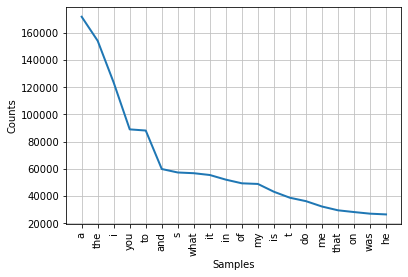

In [9]:
freq.plot(20, cumulative=False)

### Removing stop words
English stop words as `a`, `the`, `of` and `but`. The list of stop words is:

In [10]:
# collect then English stop words
sw = stopwords.words('english') 
print (sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# remove these stop words from tokens 
tokens_no_stops = [word for word in jokes_clean_tokens if word not in sw]
tokens_no_stops[:20] # first 20
#tokens_no_stops

['narrating',
 'documentary',
 'narrators',
 'hear',
 'saying',
 'cuz',
 'talking',
 'telling',
 'daughter',
 'garlic',
 'good',
 'good',
 'immune',
 'system',
 'keeps',
 'pests',
 'away',
 'ticks',
 'mosquitos',
 'vampires']

#### Word count revisited

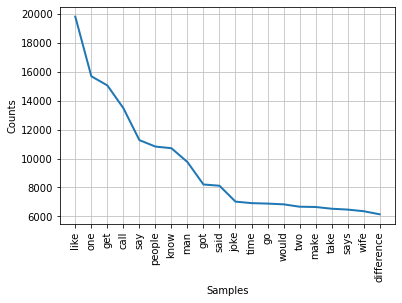

In [12]:
freq = nltk.FreqDist(tokens_no_stops)
freq.plot(20, cumulative=False)

### Word stemming
or: removing affixes from words and return the root word

In [13]:
stemmer = PorterStemmer()
stemmed = [stemmer.stem(token) for token in tokens_no_stops]
stemmed[:20]

['narrat',
 'documentari',
 'narrat',
 'hear',
 'say',
 'cuz',
 'talk',
 'tell',
 'daughter',
 'garlic',
 'good',
 'good',
 'immun',
 'system',
 'keep',
 'pest',
 'away',
 'tick',
 'mosquito',
 'vampir']

### Part-of-Speech tagging


In [14]:
# the tagger for English uses Penn Treebank tagset.
pos_tagged = nltk.pos_tag(tokens_no_stops)
pos_tagged[:20]

[('narrating', 'VBG'),
 ('documentary', 'JJ'),
 ('narrators', 'NNS'),
 ('hear', 'VBP'),
 ('saying', 'VBG'),
 ('cuz', 'NN'),
 ('talking', 'VBG'),
 ('telling', 'VBG'),
 ('daughter', 'NN'),
 ('garlic', 'JJ'),
 ('good', 'JJ'),
 ('good', 'NN'),
 ('immune', 'NN'),
 ('system', 'NN'),
 ('keeps', 'VBZ'),
 ('pests', 'VBZ'),
 ('away', 'RB'),
 ('ticks', 'NNS'),
 ('mosquitos', 'VBP'),
 ('vampires', 'NNS')]

In [ ]:
# meaning of tags (Penn Treebank)
nltk.help.upenn_tagset()

As the tags for **p**art **o**f **s**peech in lemmatizer are different from those used by [WordNet](https://wordnet.princeton.edu), the conversion function below converts to the proper tags used in lemmatizer (borrowed from IBMDeveloperUK):

In [15]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ # 'a'
    elif treebank_tag.startswith('V'):
        return wordnet.VERB # 'v'
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN # 'n'
    elif treebank_tag.startswith('R'):
        return wordnet.ADV # 'r'
    else:
        return 'n'

In [16]:
pos_tagged_wn = [(val[0], get_wordnet_pos(val[1])) for val in pos_tagged]
pos_tagged_wn[:20]

[('narrating', 'v'),
 ('documentary', 'a'),
 ('narrators', 'n'),
 ('hear', 'v'),
 ('saying', 'v'),
 ('cuz', 'n'),
 ('talking', 'v'),
 ('telling', 'v'),
 ('daughter', 'n'),
 ('garlic', 'a'),
 ('good', 'a'),
 ('good', 'n'),
 ('immune', 'n'),
 ('system', 'n'),
 ('keeps', 'v'),
 ('pests', 'v'),
 ('away', 'r'),
 ('ticks', 'n'),
 ('mosquitos', 'v'),
 ('vampires', 'n')]

### Lemmatizing words
Something like stemming but returning real words or synonyms.

In [17]:
lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(token[0], pos = token[1]) for token in pos_tagged_wn]
lemmatized[:20]

['narrate',
 'documentary',
 'narrator',
 'hear',
 'say',
 'cuz',
 'talk',
 'tell',
 'daughter',
 'garlic',
 'good',
 'good',
 'immune',
 'system',
 'keep',
 'pests',
 'away',
 'tick',
 'mosquitos',
 'vampire']

### Bi-grams
Or n-grams with 2 words. Actually word pairs.

In [18]:
# argument the tokenized string (with the stop words)
bigrams = list(nltk.bigrams(jokes_clean_tokens))
bigrams[:25]

[('me', 'narrating'),
 ('narrating', 'a'),
 ('a', 'documentary'),
 ('documentary', 'about'),
 ('about', 'narrators'),
 ('narrators', 'i'),
 ('i', 'can'),
 ('can', 't'),
 ('t', 'hear'),
 ('hear', 'what'),
 ('what', 'they'),
 ('they', 're'),
 ('re', 'saying'),
 ('saying', 'cuz'),
 ('cuz', 'i'),
 ('i', 'm'),
 ('m', 'talking'),
 ('talking', 'telling'),
 ('telling', 'my'),
 ('my', 'daughter'),
 ('daughter', 'garlic'),
 ('garlic', 'is'),
 ('is', 'good'),
 ('good', 'for'),
 ('for', 'you')]

Find the most common bi-grams

In [19]:
c = collections.Counter # we need this counter c once
c(bigrams).most_common(20)

[(('do', 'you'), 19990),
 (('i', 'm'), 16324),
 (('what', 'do'), 15682),
 (('don', 't'), 13778),
 (('it', 's'), 13178),
 (('in', 'the'), 12138),
 (('what', 's'), 11666),
 (('you', 'call'), 10295),
 (('did', 'the'), 8499),
 (('to', 'the'), 8489),
 (('s', 'the'), 8039),
 (('in', 'a'), 7325),
 (('call', 'a'), 7102),
 (('and', 'a'), 6830),
 (('can', 't'), 6634),
 (('you', 're'), 6257),
 (('of', 'the'), 6223),
 (('on', 'the'), 6119),
 (('what', 'did'), 6015),
 (('difference', 'between'), 5973)]

The same but without stop-words

In [20]:
bigrams = list(nltk.bigrams(tokens_no_stops))
c(bigrams).most_common(20)

[(('walks', 'bar'), 1952),
 (('knock', 'knock'), 1846),
 (('gon', 'na'), 1526),
 (('last', 'night'), 1332),
 (('year', 'old'), 1319),
 (('light', 'bulb'), 1199),
 (('take', 'change'), 1189),
 (('wan', 'na'), 1165),
 (('donald', 'trump'), 1048),
 (('walk', 'bar'), 1035),
 (('cross', 'road'), 895),
 (('take', 'screw'), 876),
 (('every', 'time'), 841),
 (('like', 'like'), 751),
 (('like', 'women'), 750),
 (('get', 'cross'), 741),
 (('chuck', 'norris'), 710),
 (('women', 'like'), 685),
 (('man', 'walks'), 649),
 (('change', 'lightbulb'), 647)]

Makes more sense. But what if we counted the longer n-grams?

In [21]:
n_grams = list(nltk.ngrams(tokens_no_stops, 10))
c(n_grams).most_common(10)

[(('na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na'), 31),
 (('knock',
   'knock',
   'knock',
   'knock',
   'knock',
   'knock',
   'knock',
   'knock',
   'knock',
   'knock'),
  31),
 (('sex',
   'sex',
   'sex',
   'free',
   'sex',
   'tonight',
   'said',
   'wow',
   'friend',
   'said'),
  22),
 (('sorry',
   'suffer',
   'terminal',
   'illness',
   '10',
   'live',
   'patient',
   'mean',
   '10',
   '10'),
  21),
 (('suffer',
   'terminal',
   'illness',
   '10',
   'live',
   'patient',
   'mean',
   '10',
   '10',
   'months'),
  21),
 (('terminal',
   'illness',
   '10',
   'live',
   'patient',
   'mean',
   '10',
   '10',
   'months',
   'weeks'),
  21),
 (('sex',
   'sex',
   'free',
   'sex',
   'tonight',
   'said',
   'wow',
   'friend',
   'said',
   'means'),
  21),
 (('fw', 'fw', 'fw', 'fw', 'fw', 'fw', 'fw', 'fw', 'fw', 'fw'), 21),
 (('difference',
   'dirty',
   'bus',
   'stop',
   'lobster',
   'breast',
   'implants',
   'one',
   'crusty',
   'b

#### Retrospect: create one pre-processing function
The above steps can be seen as pre-processing. Now we have seen each pre-processing step separately we can create one function to do this. This function encompasses:
* remove empty jokes
* entire text to lower case
* remove punctuation from text
* tokenize all jokes to list of words
* remove tokens that are stopwords
* tagging part-of-speech of each word
* lemmatize individual words

Stemming is left out, because a word's stem is less meaningful than a lemmatized word.

In [22]:
def preprocess_jokes(jokes): 
    # if there are any, remove empty jokes
    jokes_no_empties = [joke for joke in jokes if joke != '']
    print(jokes.count(''),'empty jokes removed')

    # to lower case
    jokes_no_empties = [joke.lower() for joke in jokes_no_empties]
    print('Text converted to lower case')
    
    # remove punctuation
    jokes_no_punctuation = [joke.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation))) for joke in jokes_no_empties] 
    print('Punctuation removed')
    
    # tokenize using NLTK
    jokes_tokens = [nltk.word_tokenize(joke) for joke in jokes_no_punctuation]
    print('Jokes tokenized to list of words')
    
    # remove english stopwords
    sw = stopwords.words('english')
    jokes_no_stops = []
    for joke in jokes_tokens:
        jokes_no_stops.append([word for word in joke if word not in sw])
    print('English stopwords removed')
    
    # part-of-speech tagging (for English using the Penn Treebank tagset)
    jokes_pos_tagged = [nltk.pos_tag(joke) for joke in jokes_no_stops]
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ # 'a'
        elif treebank_tag.startswith('V'):
            return wordnet.VERB # 'v'
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN # 'n'
        elif treebank_tag.startswith('R'):
            return wordnet.ADV # 'r'
        else:
            return 'n'
    # convert to WordNet
    pos_jokes_wn = []
    for joke in jokes_pos_tagged:
        pos_jokes_wn.append([(val[0], get_wordnet_pos(val[1])) for val in joke])
    print('Part of speech tagged and converted to WordNet')
    
    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_jokes = []
    for joke in pos_jokes_wn:
        lemmatized_jokes.append([lemmatizer.lemmatize(token[0], pos = token[1]) for token in joke])
    print('Lemmatizing finished; returning lemmatized words')
    
    return lemmatized_jokes

In [23]:
jokes = [joke for joke in df.Joke]
lemmatized_jokes = preprocess_jokes(jokes)
print(lemmatized_jokes[:20])

0 empty jokes removed
Text converted to lower case
Punctuation removed
Jokes tokenized to list of words
English stopwords removed
Part of speech tagged and converted to WordNet
Lemmatizing finished; returning lemmatized words
[['narrate', 'documentary', 'narrator', 'hear', 'say', 'cuz', 'talk'], ['tell', 'daughter', 'garlic', 'good', 'good', 'immune', 'system', 'keep', 'pests', 'away', 'tick', 'mosquitos', 'vampire', 'men'], ['go', 'really', 'rough', 'period', 'work', 'week', 'fault', 'swap', 'tampax', 'sand', 'paper'], ['could', 'dinner', 'anyone', 'dead', 'alive', 'would', 'choose', 'alive', 'b', 'j', 'novak'], ['two', 'guy', 'walk', 'bar', 'third', 'guy', 'duck'], ['barbie', 'get', 'pregnant', 'ken', 'come', 'different', 'box', 'heyooooooo'], ['musician', 'arrest', 'get', 'treble'], ['hear', 'guy', 'blow', 'entire', 'lottery', 'winning', 'limousine', 'nothing', 'leave', 'chauffeur'], ['bird', 'shit', 'car', 'ask'], ['real', 'gentleman', 'always', 'open', 'fridge', 'door'], ['tell', 

## And now for something completely different...
As to quote Monty Python's 1971 film. My intention was to classify these jokes after assigning a relevant category to each joke (the dataset has no category column). However I don't know these categories and it seems a hell of a job to create/find an algorithm that assigns categories to the 231657 jokes in the dataset.

We might use the `shortjokes` dataset as a basis for a AI joke generator. Bur before trying this, let's examine the `pyjokes` library that enables us to create random jokes.

### Pyjokes
According to the `PyPI` description: One line jokes for programmers (jokes as a service). There are 2 available API's each accepting two parameters: the language and the category. Known categories: neutral, twister, all and chuck. It reminds me of the `fortune cookies` on Unix systems a long time ago; after each login a cookie was displayed.<br><br>The `pyjokes` library must be installed from a notebook cell or from `anaconda`.

In [24]:
import pyjokes

In [25]:
one_joke = pyjokes.get_joke(language = 'en', category = 'neutral')
print(one_joke)

What do you call a programmer from Finland? Nerdic.


In [26]:
more_jokes = pyjokes.get_jokes(language = 'de', category = 'twister')
print(more_jokes)

['Acht alte Ameisen aßen am Abend Ananas. ', "Als wir noch in der Wiege lagen, gab's noch keine Liegewagen. Jetzt kann man in den Wagen liegen und sich in allen Lagen wiegen. ", 'Brautkleid bleibt Brautkleid und Blaukraut bleibt Blaukraut.', 'Denen Dänen, denen Dänen Dänen dehnen, dehnen deren Dänen.', 'Einsame Esel essen nasse Nesseln gern, nasse Nesseln essen einsame Esel gern.', 'Der dicke Dachdecker deckt dir dein Dach. Drum dank dem Dachdecker, der dir dein Dach deckt.', 'Der Frosterfrosch frostet im Froschfroster, frostet der Frosterfrosch im Froschfroster? Im Froschfroster frostet der Frosterfrosch.', 'Fromme Frösche fressen frische Frühlingszwiebeln, aber freche Frösche fressen frische Früchte', 'Der Cottbusser Postkutscher putzt den Cottbusser Postkutschkasten. Den Cottbusser Postkutschkasten putzt der Cottbusser Postkutscher.', 'Es soll vorkommen, daß die Nachkommen mit dem Einkommen nicht mehr auskommen und dann vollkommen verkommen umkommen.', 'Auf den sieben Robbenklippen 

### AI jokes generator
Entirely based on the **Teaching AI to crack Jokes!** [post](https://www.linkedin.com/pulse/teaching-ai-crack-jokes-dattaraj-rao) by Dattaraj Rao. The code is copied in the cells below.

#### My efforts in vain
My intention was to run this generator here in this notebook. After several hours browsing, reading and trying I did not succeed in getting this done on my laptop under Windows 10. My actions were:
* check for conda updates: `conda update conda`
* install prerequisite `pytorch` as follows: `conda install pytorch -c pytorch` => version 1.7.1
* install `torchvision` as follows: `conda install -c pytorch torchvision` => 
* from `anaconda prompt` installing `fastai` repeatedly failed: `conda -c fastai fastai`. 
* however installing `fastai` using `pip install fastai` succeeds => version 2.2.5

Versions as retrieved from `anaconda prompt` using `conda list [name]`

#### Google Colab
As a compromise I decided to make an exact copy of Dattaraj Rao's solution on my Google Colab notebook. Only few comment is added. [This](https://colab.research.google.com/drive/1p-pXnaH4z0_v_sgrB1jTajCoZE2DVJbj?usp=sharing) is where you can run the code of the cells below.<br>At the end there's code to save the model to Google Drive. I did not succeed due to the long inactivity while saving.

In [ ]:
pip install fastai

In [13]:
from fastai.text import *
data = (TextList.from_df(df, cols='Joke')
.random_split_by_pct(0.1)
.label_for_lm()  
.databunch(bs=48))

NameError: name 'TextList' is not defined

In [ ]:
# create deep learning model using LSTM Architecture
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3, model_dir = 'tmp/work')


# find the appropriate learning rate
learn.lr_find()


learn.recorder.plot(skip_end=15)

In [ ]:
# Fit the model based on selected learning rate
learn.fit_one_cycle(1, 0.075)

In [ ]:
# we will predict next N words
N_WORDS = 200

# make the prediction
jokes = learn.predict("", N_WORDS, temperature=0.8)

# xxbos is the seperator for data
jokes = jokes.split('xxbos')

# show the predicted jokes
print('\n'.join(jokes))